<a href="https://colab.research.google.com/github/dimoynwa/Computer-vision-tasks/blob/main/Rock_Scissors_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install dependencies



*   **ultralitics** - loading models of YOLO
*   **roboflow** - contains tons of datasets with annotations in different formats
*   **YOLO** - clone YOLOv5 as it is not official
*   Install YOLO requirements
*   Install **ClearML** for experiment tracking



In [ ]:
!pip install ultralytics
!pip install roboflow
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 && pip install -r requirements.txt
!pip install clearml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Cloning into 'yolov5'...
remote: Enumerating objects: 16554, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 16554 (delta 16), reused 4 (delta 0), pack-reused 16522
Receiving objects: 100% (16554/16554), 15.06 MiB | 12.05 MiB/s, done.
Resolving deltas: 100% (11369/11369), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is inc

## Import libraries



*   **torch** for loading, training and using models from Torch Hub ( )
*   **matplotlib.pyplot** visualizing images
*   **numpy** matrix transformation
*   **cv2** reading images/videos, access to camera and etc.



In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Load model

We will load the model from Torch hub. Pytorch Hub is a pre-trained model repository designed to facilitate research reproducibility.

For YOLO specialy we will use https://pytorch.org/hub/ultralytics_yolov5

We have an options to choose for size of model. There are different types of YOLO v5, from *n*, *s*, *m*, *l*, *x*, depending on the size. The bigger the model is, higher mAP it has, but it is slower.

The model is trained on **COCO** dataset with 80 different classes.
https://cocodataset.org/#home

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model = model.to(device)

Device: cuda


/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-4-15 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 237MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Try some predictions

Let's test the model with simple image.

In [ ]:

from PIL import Image
import requests
from io import BytesIO

url = './drive/MyDrive/Data/zidane.jpg'  # or file, Path, URL, PIL, OpenCV, numpy, list
img = cv2.imread(url)

# Inference
results = model(img)

WARNING ⚠️ NMS time limit 0.550s exceeded


In [ ]:
results.print()

image 1/1: 720x1280 2 persons, 1 tie
Speed: 2.4ms pre-process, 82.0ms inference, 752.8ms NMS per image at shape (1, 3, 384, 640)


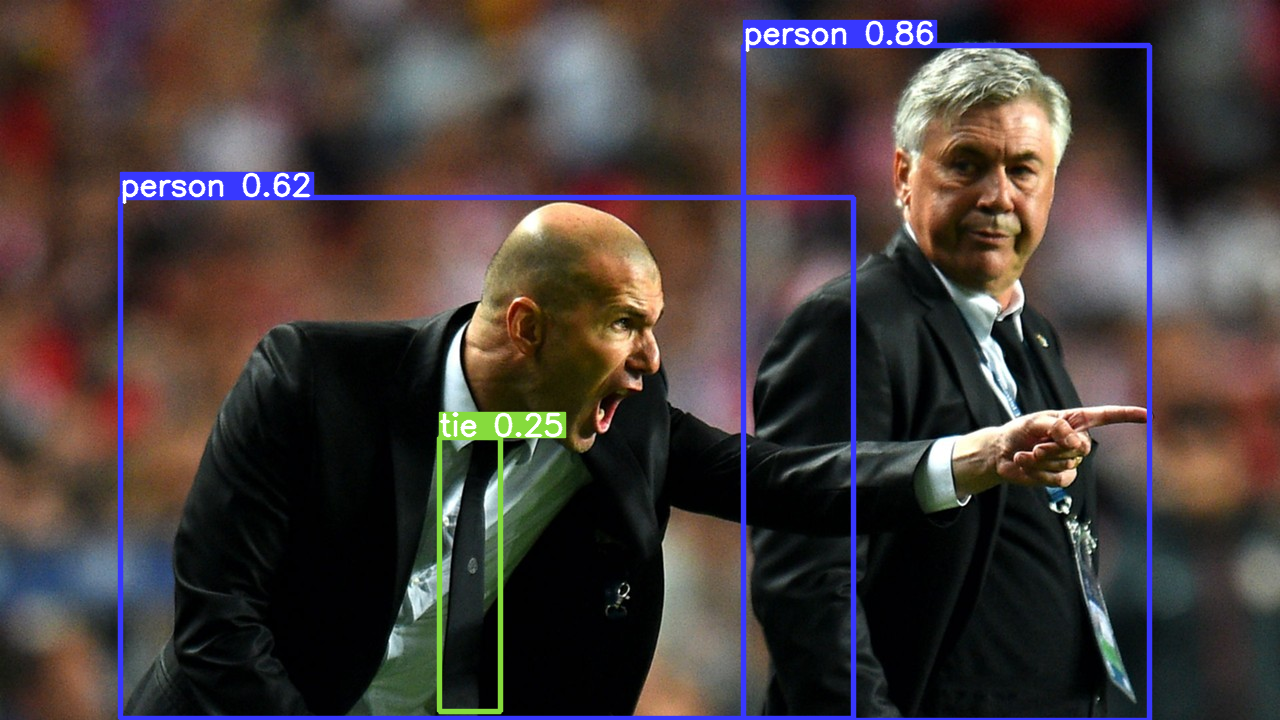

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(np.squeeze(results.render()))

In [ ]:
results.xyxy

[tensor([[7.43737e+02, 4.51978e+01, 1.14987e+03, 7.20000e+02, 8.57245e-01, 0.00000e+00],
         [1.20321e+02, 1.97518e+02, 8.53215e+02, 7.18736e+02, 6.20563e-01, 0.00000e+00],
         [4.39620e+02, 4.37163e+02, 5.00713e+02, 7.11710e+02, 2.52844e-01, 2.70000e+01]])]

## Let's try it with a Video

We will run the model la_traffic.mp4 from the current directory and will save the output.

First let's create a helper function that will save an array of frames to a video.

In [ ]:
import cv2

def save_video(frames, path) -> None:
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    frame_size = (frames[0].shape[1], frames[0].shape[0])
    writer = cv2.VideoWriter(path, fourcc, 24, frame_size)
    for frame in frames:
        writer.write(frame)
    writer.release()
    print(f'Video saved in {path}')

def process_video(input_file_path, model, output_file_path=None):
    cap = cv2.VideoCapture(input_file_path)
    frames = []
    while True:
        # cap.read() return ret (return) and frame
        # Whe there are no more frames to read, ret is False
        ret, frame = cap.read()
        if not ret:
            print('End.')
            break

        detections = model(frame)

        new_frame = np.squeeze(detections.render())

        if output_file_path:
          frames.append(new_frame)
        else:
          cv2_imshow(new_frame)
    cap.release()

    if output_file_path:
      save_video(frames, output_file_path)

In [ ]:
image_path = './drive/MyDrive/Data/la_traffic.mp4'
output_image_path = './drive/MyDrive/Data/la_out_traffic.mp4'

process_video(image_path, model, output_image_path)

End.
Video saved in ./drive/MyDrive/Data/la_out_traffic.mp4


## Train YOLO on custom dataset

We will use dataset from Roboflow.
Load the dataset. For this project we will use a dataset from Roboflow Universe called **Rock Paper Scissors SXSW Computer Vision Project**. It contains 3129 images with applied Augmentations which results to Total of 7521 images devided to 6588 Train images, 604 Validation images and 329 Test images.

For more info:
https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw/dataset/14

In [ ]:
from google.colab import userdata
roboflow_api_key = userdata.get('roboflow_api_key')

print(f'Roboflow API key: {roboflow_api_key[:2]}***')

from roboflow import Roboflow
rf = Roboflow(api_key=roboflow_api_key)
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov5")


Roboflow API key: yh***
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rock-Paper-Scissors-SXSW-14 in yolov5pytorch:: 100%|██████████| 14682/14682 [00:02<00:00, 6942.68it/s]


## Move Dataset

YOLO requires dataset to be placed in same folder. So with help of shutil library we will move it to the proper destination.

In [ ]:
import shutil

shutil.move('./Rock-Paper-Scissors-SXSW-14/', './yolov5')

'./yolov5/Rock-Paper-Scissors-SXSW-14'

In [ ]:
import shutil

shutil.move('./Rock-Paper-Scissors-SXSW-14/', './yolov5')

'./yolov5/Rock-Paper-Scissors-SXSW-14'

In [ ]:
import shutil

shutil.move('./Rock-Paper-Scissors-SXSW-14/', './yolov5')

'./yolov5/Rock-Paper-Scissors-SXSW-14'

## Lets train the model

We will train YOLOv5 model in 100 epochs.
For experiment tracking we will use **ClearML**. Do not forget to add

In [ ]:
from google.colab import userdata

clearml_api_access_key = userdata.get('clearml_api_access_key')
clearml_api_secret_key = userdata.get('clearml_api_secret_key')


%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY={clearml_api_access_key}
%env CLEARML_API_SECRET_KEY={clearml_api_secret_key}

In [ ]:
!clearml-init

ClearML SDK setup process

Please create new clearml credentials through the settings page in your `clearml-server` web app (e.g. http://localhost:8080//settings/workspace-configuration) 
Or create a free account at https://app.clear.ml/settings/workspace-configuration

In settings page, press "Create new credentials", then press "Copy to clipboard".

Paste copied configuration here:

^C


In [ ]:
!python ./yolov5/train.py --img 640 --epochs 100 --optimizer Adam --data ./yolov5/Rock-Paper-Scissors-SXSW-14/data.yaml --weights yolov5s.pt --save-period 10 --name rsp-sxsw-14-first-exp

2024-04-14 13:00:59.900621: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 13:00:59.900690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 13:00:59.902076: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=./yolov5/Rock-Paper-Scissors-SXSW-14/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False,

# Load model

Load the model form ClearML

In [ ]:
from clearml import Task, Model

In [ ]:
model_list = Model.query_models(
    # Only models from `examples` project
    project_name='Rock Sc Paper',
    # Only models with input name
    model_name=None,
    # Only models with `demo` tag or models without `TF` tag
    tags=[],
    # If `True`, only published models
    only_published=False,
    # If `True`, include archived models
    include_archived=True,
    # Maximum number of models returned
    max_results=5,
    # Only models with matching metadata
    metadata={ }
)

In [ ]:
a_task = Task.get_task(task_id='9290f367d147440991aca160a1fd4fcf')

In [ ]:
a_task.artifacts

{}

In [ ]:
import shutil

shutil.move('./yolov5/runs/train', './drive/MyDrive/Data/')

'./drive/MyDrive/Data/train'